In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states

# Using cenpy to query for Census data

The following codes are used <br>
'B01001_001E': 'total_pop', <br>
'B17001_001E': 'total_pov',<br>
'B17001_002E': 'total_pov_below',<br>
'B19013_001E': 'median_income',<br>
'B25010_001E': 'household_size',<br>
'B08012_001E': 'workers_who_commute',<br>
'B08013_001E': 'agg_travel_time_min',<br>

In [2]:
# !pip install cenpy==1.0.1

In [52]:
import cenpy as cen
from cenpy import products
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline


### getting california county names to query

In [4]:
counties = pd.read_csv("California_Counties.csv")

#building names
county_name = counties['Name'] + ', CA'
county_name[0]

ca_data = pd.DataFrame()


In [7]:
## query data
# takes about 1 hour

ca_data = pd.DataFrame()
for name in county_name:
    county = products.ACS(2019).from_county(name,level='tract',variables=['B01001_001E',
                                                                            'B17001_001E',
                                                                            'B17001_002E',
                                                                            'B19013_001E',
                                                                            'B25010_001E',
                                                                            'B08012_001E',
                                                                            'B08013_001E',
                                                                           ])
    ca_data = pd.concat([ca_data, county])
    
variables = {
    'B01001_001E': 'total_pop',
    'B17001_001E': 'total_pov',
    'B17001_002E': 'total_pov_below',
    'B19013_001E': 'median_income',
    'B25010_001E': 'household_size',
    'B08012_001E': 'workers_who_commute',
    'B08013_001E': 'agg_travel_time_min',
}

ca_data = ca_data.rename(columns=variables)

C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predica

C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a fu

C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
C:\Users\psle1\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shap

## adding population density as a column

### we are selecting any density greater than 25% quartile

In [17]:
ca_data['pop_density'] = ca_data['total_pop'] / ca_data.geometry.area

In [21]:
ca_data['pop_density'].describe()
ca_data_dense = ca_data[ca_data['pop_density'] > 0.000653]

In [31]:
ca_data_dense = ca_data_dense.reset_index(drop = True)

In [32]:
def income_checker(df):
    single_income = 51000
    four_income = 106000
    
    h_size = df['household_size']
    income = df['median_income']
    eligible = []
    
    for i in range(len(h_size)):
        income_eligibility = 51000 + (h_size[i]-1)*(106000-51000)/(4-1)
        if income[i] <= income_eligibility:
            eligible.append(True)
        else:
            eligible.append(False)

    df['eligible'] = eligible
    return df

income_checker(ca_data_dense)

In [35]:
ca_data_dense = ca_data_dense[ca_data_dense['eligible'] == True]
ca_data_dense = ca_data_dense.reset_index(drop = True)

,GEOID,geometry,total_pop,workers_who_commute,agg_travel_time_min,total_pov,total_pov_below,median_income,household_size,NAME,state,county,tract,pop_density,eligible
0,06015000104,"POLYGON ((-13825929.180 5127044.420, -13825924...",2428.0,863.0,11415.0,2415.0,398.0,31053.0,2.72,"Census Tract 1.04, Del Norte County, California",06,015,000104,0.000664,True
1,06023000300,"POLYGON ((-13824839.030 4979035.570, -13824835...",5788.0,2305.0,32400.0,5784.0,1683.0,41967.0,2.35,"Census Tract 3, Humboldt County, California",06,023,000300,0.001076,True
2,06023000500,"POLYGON ((-13821938.270 4983697.650, -13821902...",4450.0,1464.0,21220.0,4059.0,1146.0,31147.0,2.04,"Census Tract 5, Humboldt County, California",06,023,000500,0.000981,True
3,06023000200,"POLYGON ((-13825607.470 4980062.100, -13825171...",5428.0,2615.0,37965.0,5366.0,506.0,45919.0,2.13,"Census Tract 2, Humboldt County, California",06,023,000200,0.000839,True
4,06023000600,"POLYGON ((-13821653.060 4982135.930, -13821592...",4998.0,2151.0,24955.0,4925.0,342.0,62885.0,2.39,"Census Tract 6, Humboldt County, California",06,023,000600,0.000861,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,06111004400,"POLYGON ((-13269673.590 4047926.020, -13269639...",8086.0,3583.0,96880.0,8042.0,1228.0,59167.0,3.00,"Census Tract 44, Ventura County, California",06,111,004400,0.002306,True
6034,06111004505,"POLYGON ((-13267779.040 4049610.370, -13267771...",2208.0,972.0,23730.0,2148.0,242.0,64226.0,4.63,"Census Tract 45.05, Ventura County, California",06,111,004505,0.002696,True
6036,06111004000,"POLYGON ((-13266796.540 4050638.020, -13266796...",7179.0,3254.0,89345.0,7022.0,1317.0,60041.0,5.06,"Census Tract 40, Ventura County, California",06,111,004000,0.003874,True
6037,06111005403,"POLYGON ((-13251368.660 4058161.740, -13251368...",2582.0,1172.0,25015.0,2579.0,170.0,52688.0,2.82,"Census Tract 54.03, Ventura County, California",06,111,005403,0.002335,True


In [36]:
ca_data_dense = ca_data_dense.reset_index(drop = True)

<AxesSubplot: >

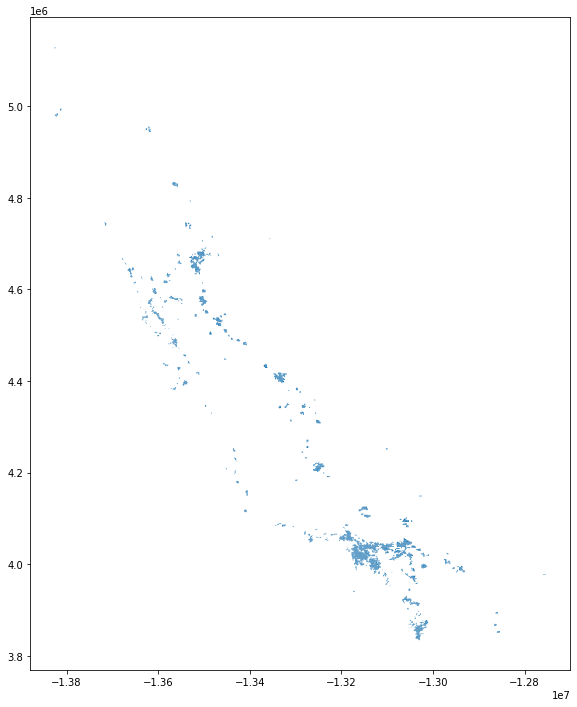

In [38]:
ca_data_dense['geometry'].plot(figsize = (12,12))

In [41]:
ca_data_dense

,GEOID,geometry,total_pop,workers_who_commute,agg_travel_time_min,total_pov,total_pov_below,median_income,household_size,NAME,state,county,tract,pop_density,eligible
0,06015000104,"POLYGON ((-13825929.180 5127044.420, -13825924...",2428.0,863.0,11415.0,2415.0,398.0,31053.0,2.72,"Census Tract 1.04, Del Norte County, California",06,015,000104,0.000664,True
1,06023000300,"POLYGON ((-13824839.030 4979035.570, -13824835...",5788.0,2305.0,32400.0,5784.0,1683.0,41967.0,2.35,"Census Tract 3, Humboldt County, California",06,023,000300,0.001076,True
2,06023000500,"POLYGON ((-13821938.270 4983697.650, -13821902...",4450.0,1464.0,21220.0,4059.0,1146.0,31147.0,2.04,"Census Tract 5, Humboldt County, California",06,023,000500,0.000981,True
3,06023000200,"POLYGON ((-13825607.470 4980062.100, -13825171...",5428.0,2615.0,37965.0,5366.0,506.0,45919.0,2.13,"Census Tract 2, Humboldt County, California",06,023,000200,0.000839,True
4,06023000600,"POLYGON ((-13821653.060 4982135.930, -13821592...",4998.0,2151.0,24955.0,4925.0,342.0,62885.0,2.39,"Census Tract 6, Humboldt County, California",06,023,000600,0.000861,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,06111004400,"POLYGON ((-13269673.590 4047926.020, -13269639...",8086.0,3583.0,96880.0,8042.0,1228.0,59167.0,3.00,"Census Tract 44, Ventura County, California",06,111,004400,0.002306,True
3831,06111004505,"POLYGON ((-13267779.040 4049610.370, -13267771...",2208.0,972.0,23730.0,2148.0,242.0,64226.0,4.63,"Census Tract 45.05, Ventura County, California",06,111,004505,0.002696,True
3832,06111004000,"POLYGON ((-13266796.540 4050638.020, -13266796...",7179.0,3254.0,89345.0,7022.0,1317.0,60041.0,5.06,"Census Tract 40, Ventura County, California",06,111,004000,0.003874,True
3833,06111005403,"POLYGON ((-13251368.660 4058161.740, -13251368...",2582.0,1172.0,25015.0,2579.0,170.0,52688.0,2.82,"Census Tract 54.03, Ventura County, California",06,111,005403,0.002335,True


In [42]:
from shapely import wkt
ca_data_dense['str_geom'] = ca_data_dense.geometry.apply(lambda x: wkt.dumps(x))

In [44]:
from shapely import wkt
from pyproj import Transformer

geometries = ca_data_dense['geometry']
latitudes = []
longitudes = []
for geom in geometries:
    geom_str = (str(geom))
    p1 = wkt.loads(geom_str)
    x1,y1 = p1.centroid.coords[0]
    transformer = Transformer.from_crs("epsg:3857", "epsg:4326")
    lat, lon = transformer.transform(x1,y1)
    latitudes.append(lat)
    longitudes.append(lon)

In [45]:
len(longitudes)

3835

In [46]:
ca_data_dense['latitudes'] = latitudes
ca_data_dense['longitudes'] = longitudes

In [47]:
ca_data_dense.to_file('ca_data_dense.geojson', driver='GeoJSON')  
ca_data_dense.to_file('ca_data_dense.shp') 

<ipython-input-47-bcb1041468f8>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ca_data_dense.to_file('ca_data_dense.shp')


In [48]:
centroid_df = pd.DataFrame()


In [50]:
ca_data_dense.head()

,GEOID,geometry,total_pop,workers_who_commute,agg_travel_time_min,total_pov,total_pov_below,median_income,household_size,NAME,state,county,tract,pop_density,eligible,str_geom,latitudes,longitudes
0,06015000104,"POLYGON ((-13825929.180 5127044.420, -13825924...",2428.0,863.0,11415.0,2415.0,398.0,31053.0,2.72,"Census Tract 1.04, Del Norte County, California",06,015,000104,0.000664,True,POLYGON ((-13825929.1799999997019768 5127044.4...,41.775514,-124.193060
1,06023000300,"POLYGON ((-13824839.030 4979035.570, -13824835...",5788.0,2305.0,32400.0,5784.0,1683.0,41967.0,2.35,"Census Tract 3, Humboldt County, California",06,023,000300,0.001076,True,POLYGON ((-13824839.0299999993294477 4979035.5...,40.773331,-124.171685
2,06023000500,"POLYGON ((-13821938.270 4983697.650, -13821902...",4450.0,1464.0,21220.0,4059.0,1146.0,31147.0,2.04,"Census Tract 5, Humboldt County, California",06,023,000500,0.000981,True,POLYGON ((-13821938.2699999995529652 4983697.6...,40.802283,-124.150981
3,06023000200,"POLYGON ((-13825607.470 4980062.100, -13825171...",5428.0,2615.0,37965.0,5366.0,506.0,45919.0,2.13,"Census Tract 2, Humboldt County, California",06,023,000200,0.000839,True,POLYGON ((-13825607.4700000006705523 4980062.0...,40.784864,-124.179150
4,06023000600,"POLYGON ((-13821653.060 4982135.930, -13821592...",4998.0,2151.0,24955.0,4925.0,342.0,62885.0,2.39,"Census Tract 6, Humboldt County, California",06,023,000600,0.000861,True,POLYGON ((-13821653.0600000005215406 4982135.9...,40.788608,-124.150128


In [53]:
centroid_df['latitudes'] = latitudes
centroid_df['longitudes'] = longitudes
centroid_df['tract_name'] = ca_data_dense['NAME'].reset_index(drop=True)
centroid_df['median_income'] = ca_data_dense['median_income'].reset_index(drop=True)
centroid_df['GEOID'] = ca_data_dense['GEOID'].reset_index(drop=True)
centroid_df['agg_travel_time_min'] = ca_data_dense['agg_travel_time_min'].reset_index(drop=True)
centroid_df['workers_who_commute'] = ca_data_dense['workers_who_commute'].reset_index(drop=True)
centroid_df['total_pop'] = ca_data_dense['total_pop'].reset_index(drop=True)


centroid_df.to_csv('low_income_tracts_centroid.csv',index=False)

In [94]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
x1,y1 = poly_coordinates[0]
x2,y2 = transform(inProj,outProj,x1,y1)
print (x2,y2)

-124.19321999661334 41.73135401886027


C:\Users\psle1\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\psle1\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-94-594e64d4ccfe>:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2,y2 = transform(inProj,outProj,x1,y1)


In [124]:
import json
from shapely.geometry import Polygon, mapping

poly = geom_test
poly_mapped = mapping(poly)

poly_coordinates = poly_mapped['coordinates'][0]

poly_ = [{'lat': coords[1],'lon': coords[0]} for coords in poly_coordinates]

print(json.stringify(poly_))

AttributeError: module 'json' has no attribute 'stringify'

In [ ]:
low_income_tracts = states[states['B19013_001E'] < 51000]
low_income_tracts.shape

(2451, 7)

In [ ]:
low_income_tracts.to_file('/content/drive/MyDrive/263N project/Data/household_income/low_income_tracts.geojson', driver='GeoJSON')  
low_income_tracts.to_file('/content/drive/MyDrive/263N project/Data/household_income/low_income_tracts.shp') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


In [ ]:
ca = products.ACS(2019).from_state('California',level='county',
                                        variables=['B19013_001E'])

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/cenpy/products.py:767: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(state, variables, level, "States", **kwargs)


In [ ]:
ca_income.head()

,GEOID,geometry,B19013_001E,NAME,state,county,tract
0,34033020200,"POLYGON ((-8401910.930 4827319.710, -8401894.9...",48125.0,"Census Tract 202, Salem County, New Jersey",34,033,020200
1,34033990000,"POLYGON ((-8411697.240 4791137.060, -8411199.4...",NaN,"Census Tract 9900, Salem County, New Jersey",34,033,990000
2,34033022201,"POLYGON ((-8409882.740 4792971.850, -8409882.7...",95000.0,"Census Tract 222.01, Salem County, New Jersey",34,033,022201
3,34015502300,"POLYGON ((-8384571.470 4827388.900, -8384566.6...",81071.0,"Census Tract 5023, Gloucester County, New Jersey",34,015,502300
4,34015500205,"POLYGON ((-8375343.190 4841783.180, -8375337.2...",61250.0,"Census Tract 5002.05, Gloucester County, New J...",34,015,500205


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


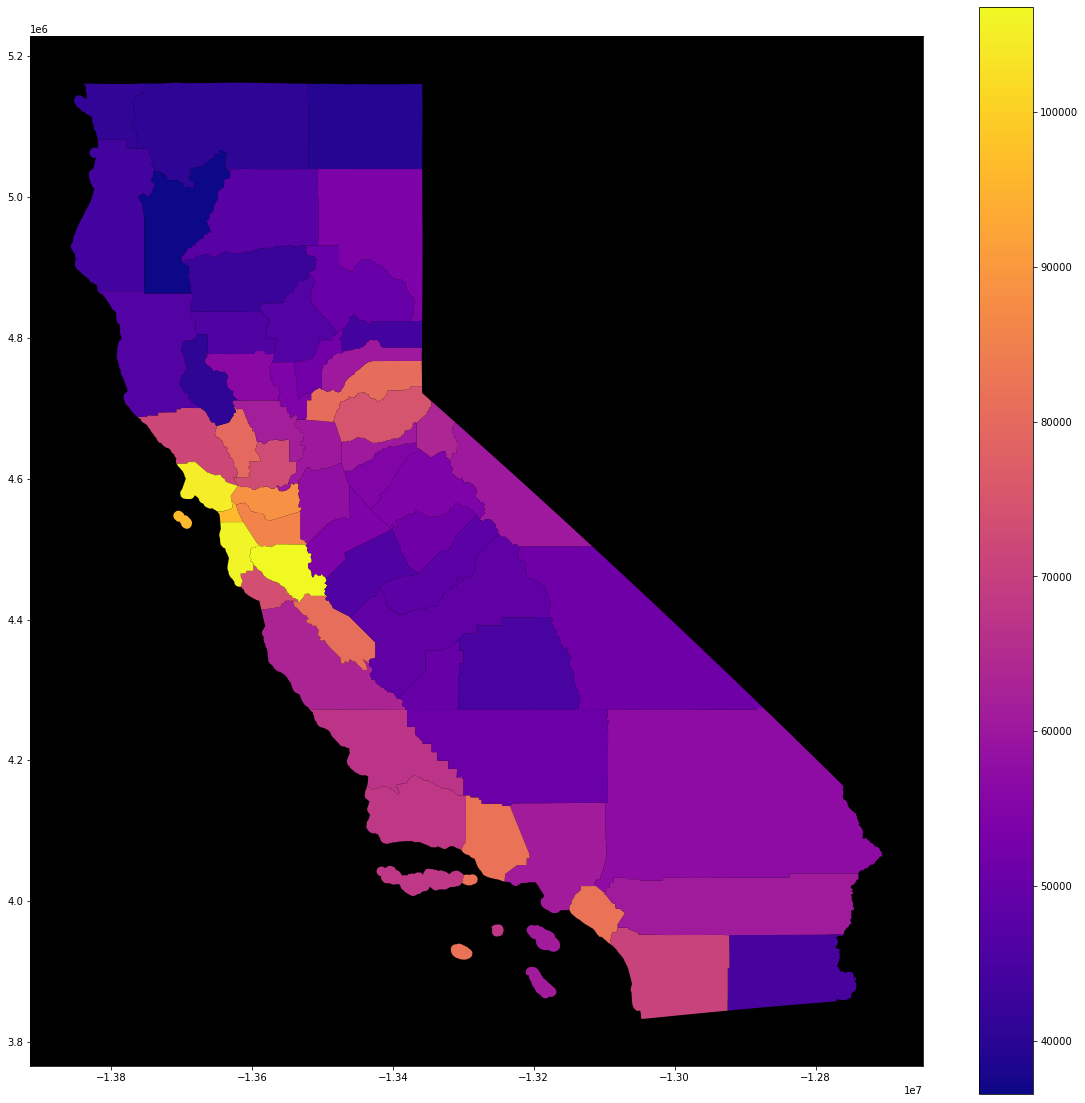

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ca.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

### Median household income: B19013_001E
### Contact Rent: B25056_001E
### Households with food stamp: B19058_001E 

In [ ]:
berkeley = products.ACS(2017).from_place('Berkeley',level='tract',
                                        variables=['B19013_001E','B25056_001E','B19058_001E','B05010_001E'])

/usr/local/lib/python3.7/dist-packages/cenpy/products.py:799: UserWarning: Uncertain place identifier "Berkeley". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing,
/usr/local/lib/python3.7/dist-packages/cenpy/products.py:996: UserWarning: Cannot disambiguate placename Berkeley. Picking the shortest, best matched placename, Berkeley city, from Berkeley city, Berkeley city
  matchtarget, ixmax_row.target, ", ".join(double_winners.target.tolist())


Matched: Berkeley to Berkeley city within layer Incorporated Places


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  


In [ ]:
berkeley

,GEOID,geometry,B05010_001E,B19013_001E,B19058_001E,B25056_001E,state,county,tract
0,06067005509,"POLYGON ((-13515892.040 4662071.270, -13515891...",224.0,31899.0,939.0,874.0,06,067,005509
1,06067005702,"POLYGON ((-13512300.430 4663070.580, -13512300...",1149.0,133375.0,1767.0,171.0,06,067,005702
2,06067005701,"POLYGON ((-13512303.990 4666024.780, -13511942...",699.0,88563.0,1219.0,389.0,06,067,005701
3,06067005505,"POLYGON ((-13515888.370 4664292.180, -13515887...",1488.0,26181.0,2212.0,1670.0,06,067,005505
4,06067005605,"POLYGON ((-13514347.820 4663316.830, -13514347...",1089.0,51433.0,1316.0,650.0,06,067,005605
5,06067005601,"POLYGON ((-13514345.700 4664350.580, -13514343...",954.0,38950.0,2290.0,1485.0,06,067,005601
6,06067005606,"POLYGON ((-13514354.050 4661365.540, -13514354...",748.0,65203.0,1819.0,904.0,06,067,005606
7,06067006002,"POLYGON ((-13512302.990 4666179.210, -13512301...",872.0,45762.0,1817.0,1035.0,06,067,006002
8,06067006102,"POLYGON ((-13514344.810 4666380.080, -13514344...",743.0,31447.0,1699.0,1318.0,06,067,006102
9,06067006004,"POLYGON ((-13512292.860 4667669.760, -13512292...",488.0,82426.0,1057.0,352.0,06,067,006004


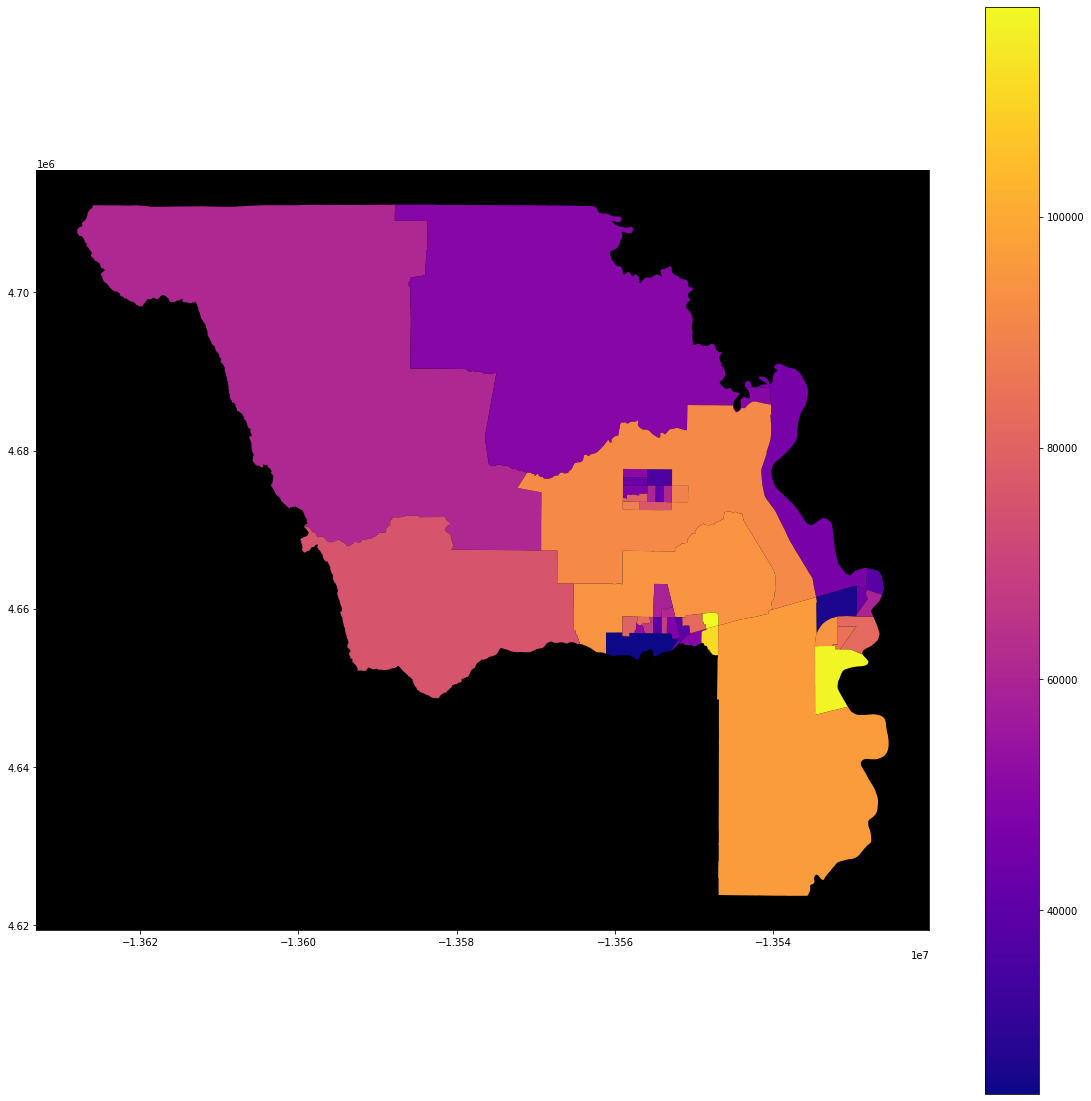

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


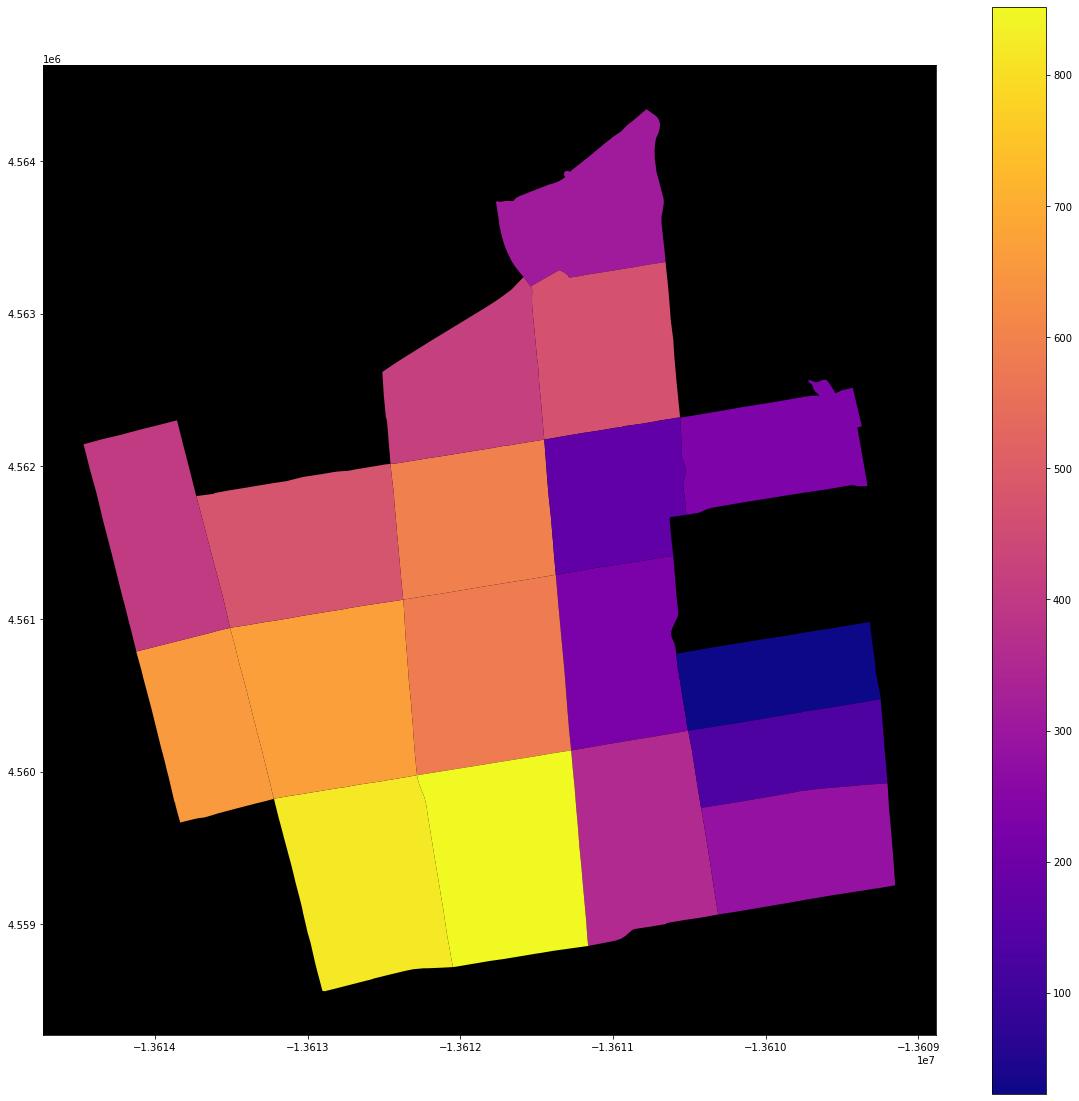

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B05010_001E'], axis=0).plot('B05010_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


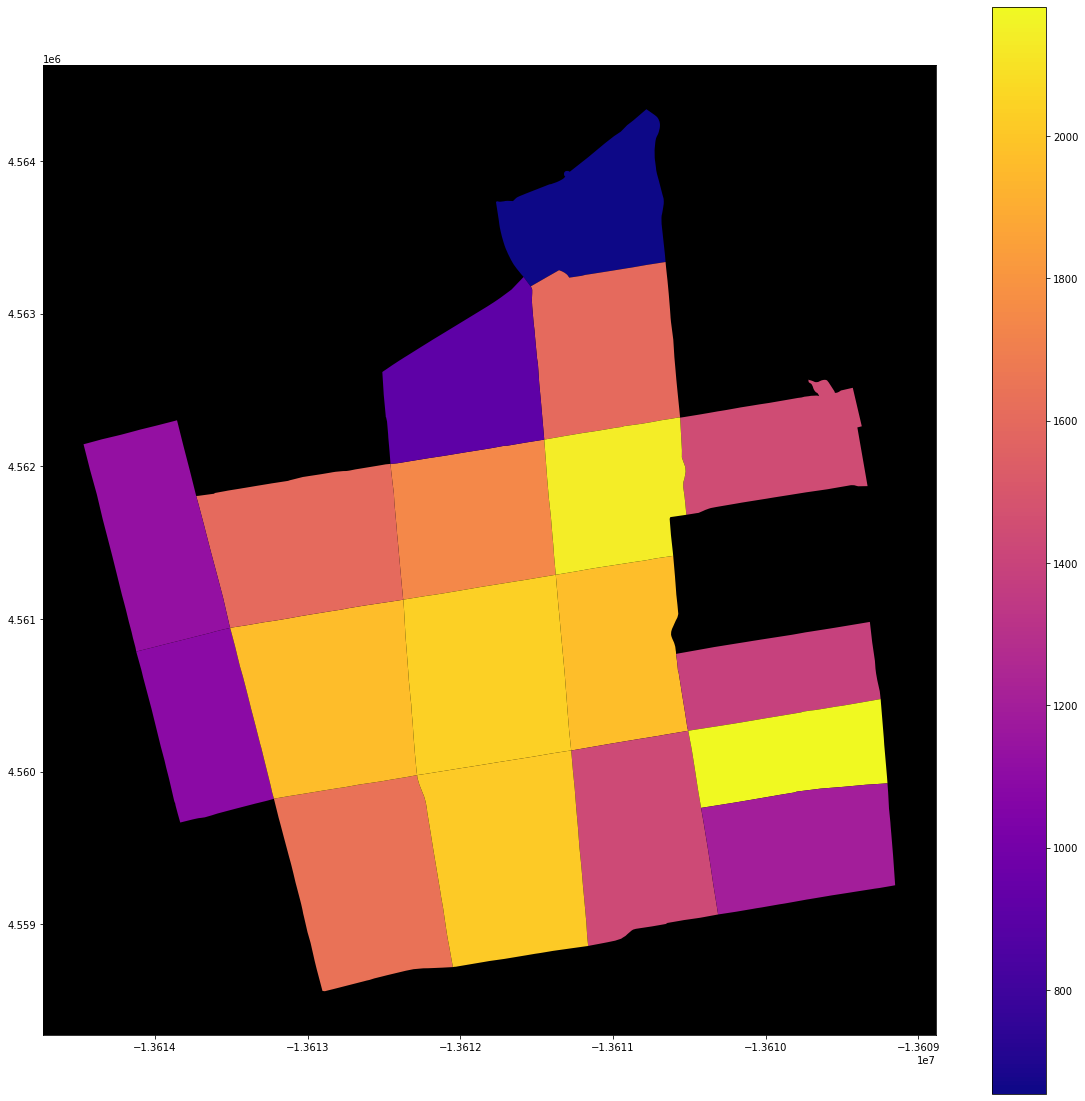

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B19058_001E'], axis=0).plot('B19058_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

In [ ]:
berkeley.head()

,GEOID,geometry,B05010_001E,B19013_001E,B19058_001E,B25056_001E,state,county,tract
0,06001423200,"POLYGON ((-13614123.370 4560786.500, -13614113...",655.0,45338.0,1094.0,775.0,06,001,423200
1,06001423300,"POLYGON ((-13613221.680 4559823.010, -13613213...",820.0,86738.0,1641.0,766.0,06,001,423300
2,06001421400,"POLYGON ((-13611767.290 4563731.830, -13611760...",308.0,146774.0,654.0,98.0,06,001,421400
3,06001423100,"POLYGON ((-13613508.330 4560942.320, -13613500...",670.0,67786.0,1966.0,1256.0,06,001,423100
4,06001422300,"POLYGON ((-13612458.250 4562016.630, -13612437...",596.0,64458.0,1741.0,1184.0,06,001,422300


## B23025_005E: Unemployed / table B23025: In Labor Force

In [ ]:
berkeley_unemp = products.ACS(2017).from_place('Berkeley',level='tract', variables=['B23025_005E'])   

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:791: UserWarning: Uncertain place identifier "Berkeley". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  geoms, variables, *rest = super(ACS, self).from_place(
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:993: UserWarning: Cannot disambiguate placename Berkeley. Picking the shortest, best matched placename, Berkeley city, from Berkeley city, Berkeley city
  warn(


Matched: Berkeley to Berkeley city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [ ]:
berkeley_unemp.head()

,GEOID,geometry,B23025_005E,state,county,tract
0,06001423200,"POLYGON ((-13614123.370 4560786.500, -13614113...",149.0,06,001,423200
1,06001423300,"POLYGON ((-13613221.680 4559823.010, -13613213...",219.0,06,001,423300
2,06001421400,"POLYGON ((-13611767.290 4563731.830, -13611760...",56.0,06,001,421400
3,06001423100,"POLYGON ((-13613508.330 4560942.320, -13613500...",105.0,06,001,423100
4,06001422300,"POLYGON ((-13612458.250 4562016.630, -13612437...",134.0,06,001,422300


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


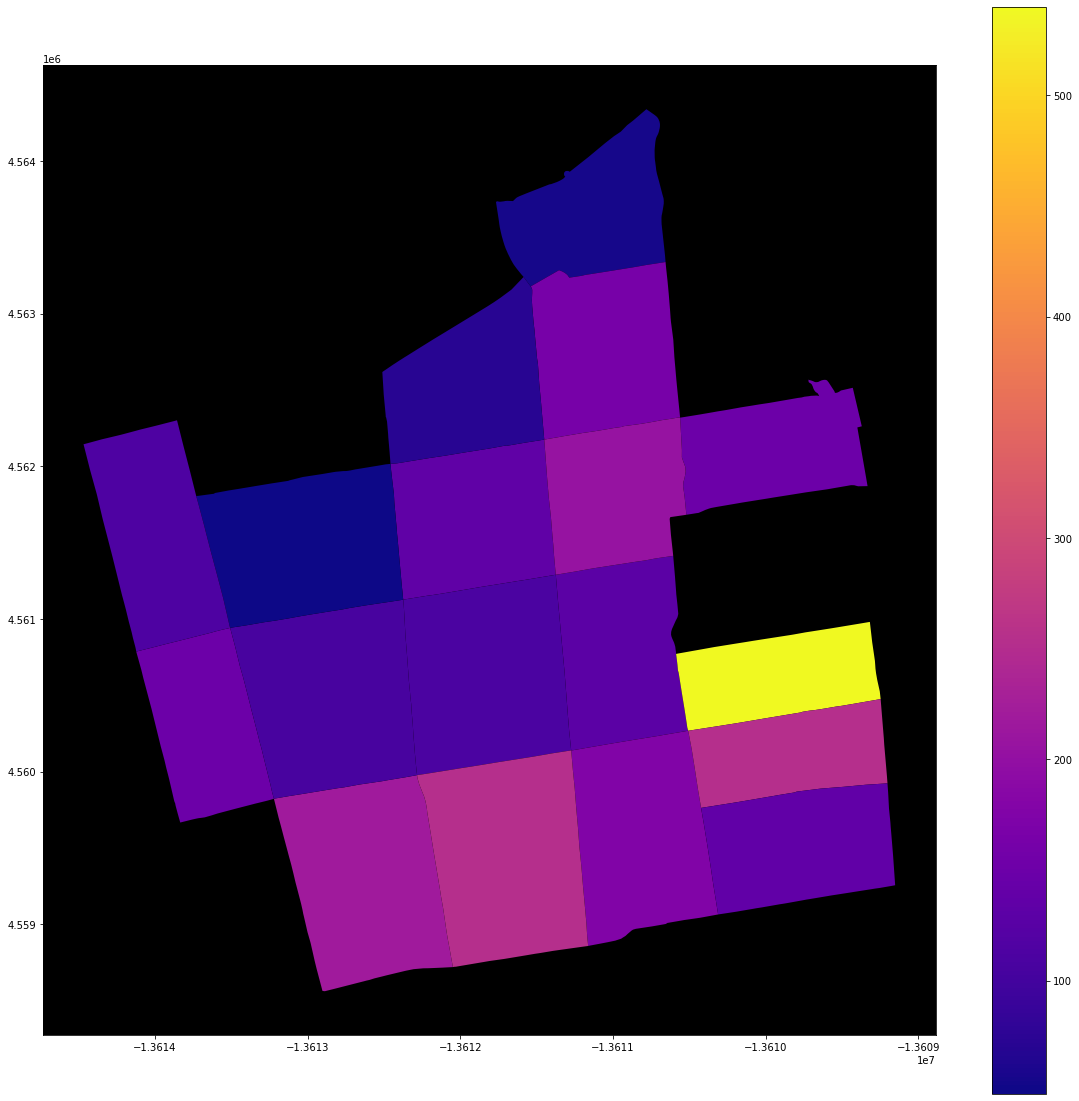

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley_unemp.dropna(subset=['B23025_005E'], axis=0).plot('B23025_005E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

Install it the prerelease candidate using:

```
pip install --pre cenpy
```

Code source at: [https://github.com/cenpy-devs/cenpy](https://github.com/cenpy-devs/cenpy)! I'll also maintain a roadmap [here](https://github.com/cenpy-devs/cenpy/milestones).

# Cenpy 1.0.0

Cenpy started as an interface to explore and query the US Census API and return Pandas Dataframes. This was mainly intended as a wrapper over the basic functionality provided by the census bureau. I was initially inspired by `acs.R` in its functionality and structure. In addition to `cenpy`, a few other census packages exist out there in the Python ecosystem, such as:

- [datamade/census](https://github.com/datamade/census) - "a python wrapper for the US Census API"
- [jtleider/censusdata](https://github.com/jtleider/censusdata) - "download data from Census API"

Others use `requests` raw on the Census API to extract the data they want. 

Most packages (including `cenpy` itself) involved a very stilted/specific API query due to the way the census API worked. Basically, it's difficult to construct an efficiently query against the census API without knowing the so-called "geographic hierarchy" in which your query fell: 

![The Census Hierarchy](https://raw.githubusercontent.com/cenpy-devs/cenpy/master/img/census_hierarchy.png)

The main census API does not allow a user to leave middle levels of the hierarchy vague: For you to get a collection of census tracts in a state, you need to query for all the *counties* in that state, then express your query about tracts in terms of a query about all the tracts in those counties. Even `tidycensus` in `R` [requires this in many common cases](https://walkerke.github.io/tidycensus/articles/basic-usage.html#geography-in-tidycensus). 

Say, to ask for all the blocks in Arizona, you'd need to send a few separate queries:
```
what are the counties in Arizona?
what are the tracts in all of these counties?
what are the blocks in all of these tracts in all of these counties?
```
This was necessary because of the way the hierarchy diagram (shown above) is structured. Blocks don't have a unique identifier outside of their own tract; if you ask for block `001010`, there might be a bunch of blocks around the country that match that identifier. Sometimes, this meant conducting a very large number of repetitive queries, since the packages are trying to build out a correct search tree hierarchy. This style of [tree search](https://en.wikipedia.org/wiki/Breadth-first_search) is relatively slow, especially when conducting this search over the internet...

So, if we focus on the geo-in-geo style queries using the hierarchy above, we're in a tough spot if we want to *also* make the API easy for humans to use. 

# Enter Geographies

Fortunately for us, a *geographic information system* can figure out these kinds of nesting relationships without having to know each of the levels above or below. This lets us use very natural query types, like:
```
what are the blocks *within* Arizona?
```
There is a *geographic information system* that `cenpy` had access to, called the Tiger Web Mapping Service. These are ESRI Mapservices that allow for a fairly complex set of queries to extract information. But, in general, neither [`census`](https://github.com/datamade/census/pull/33) nor `censusdata` used the TIGER web map service API. Cenpy's `cenpy.tiger` was a [fully-featured wrapper around the ESRI Mapservice](https://nbviewer.jupyter.org/gist/dfolch/2440ba28c2ddf5192ad7#5.-Pull-down-the-geometry), but was mainly *not* used by the package itself to solve this tricky problem of building many queries to solve the `geo-in-geo` problem. 

Instead, `cenpy1.0.0` uses the TIGER Web mapping service to intelligently get *all* the required geographies, and then queries for those geographies in a very parsimonious way. This means that, instead of tying our user interface to the census's datastructures, we can have some much more natural place-based query styles. 

# For instance

Let's grab all the tracts in Los Angeles. And, let's get the Race table, `P004`. 

The new `cenpy` API revolves around *products*, which integrate the geographic and the data APIs together. For starters, we'll use the 2010 Decennial API: 

In [ ]:
dectest = products.Decennial2010()

Now, since we don't need to worry about entering geo-in-geo structures for our queries, we can request race data for all the tracts in Los Angeles County using the following method:

In [ ]:
la = dectest.from_county('Los Angeles, CA', 
                          level='tract', 
                          variables=['^P004'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.

And, making a pretty plot of the Hispanic population in LA:

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


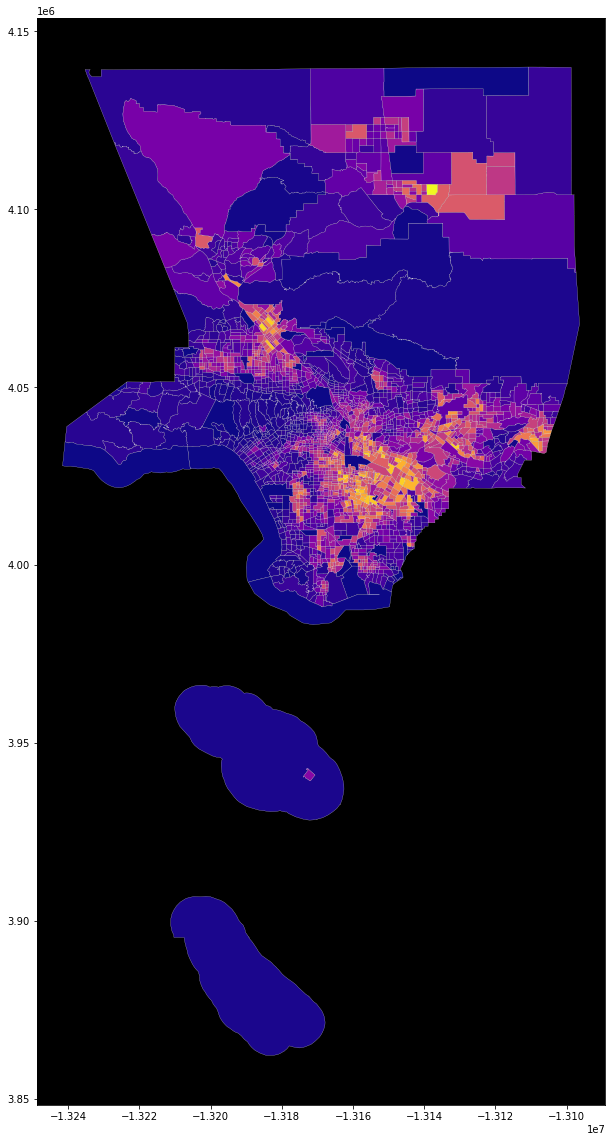

In [ ]:
f,ax = plt.subplots(1,1,figsize=(20,20))
la.plot('P004003', edgecolor='white', cmap='plasma', ax=ax, linewidth=.2)
ax.set_facecolor('k')

How this *works* from a software perspective is a significant imporvement on how the other packages, like `cenpy` itself, work.
1. Take the name the user provided and find a match `target` within a level of the census geography. *(e.g. match Los Angeles, CA to Los Angeles County)*
2. **Using the Web Mapping Service,** find all the tracts that fall within our `target`.
3. **Using the data API,** query for all the data about those tracts that are requested.

Since the Web Mapping Service provides us all the information needed to build a complete geo-in-geo query, we don't need to use repeated queries. Further, since we are using *spatial querying* to do the heavy lifting, there's no need for the user to specify a detailed geo-in-geo hierarchy: using the [Census GIS](https://tigerweb.geo.census.gov/tigerwebmain/tigerweb_restmapservice.html), we can build the hierarchy for free. 

Or, for example, a case that's difficult to deal with: census geographies that span two states. Let's just grab all the tracts in the Kansas City consolidated statistical area, regardless of which state they fall into:

In [ ]:
ks = dectest.from_csa('Kansas City', level='tract', variables=['P001001'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


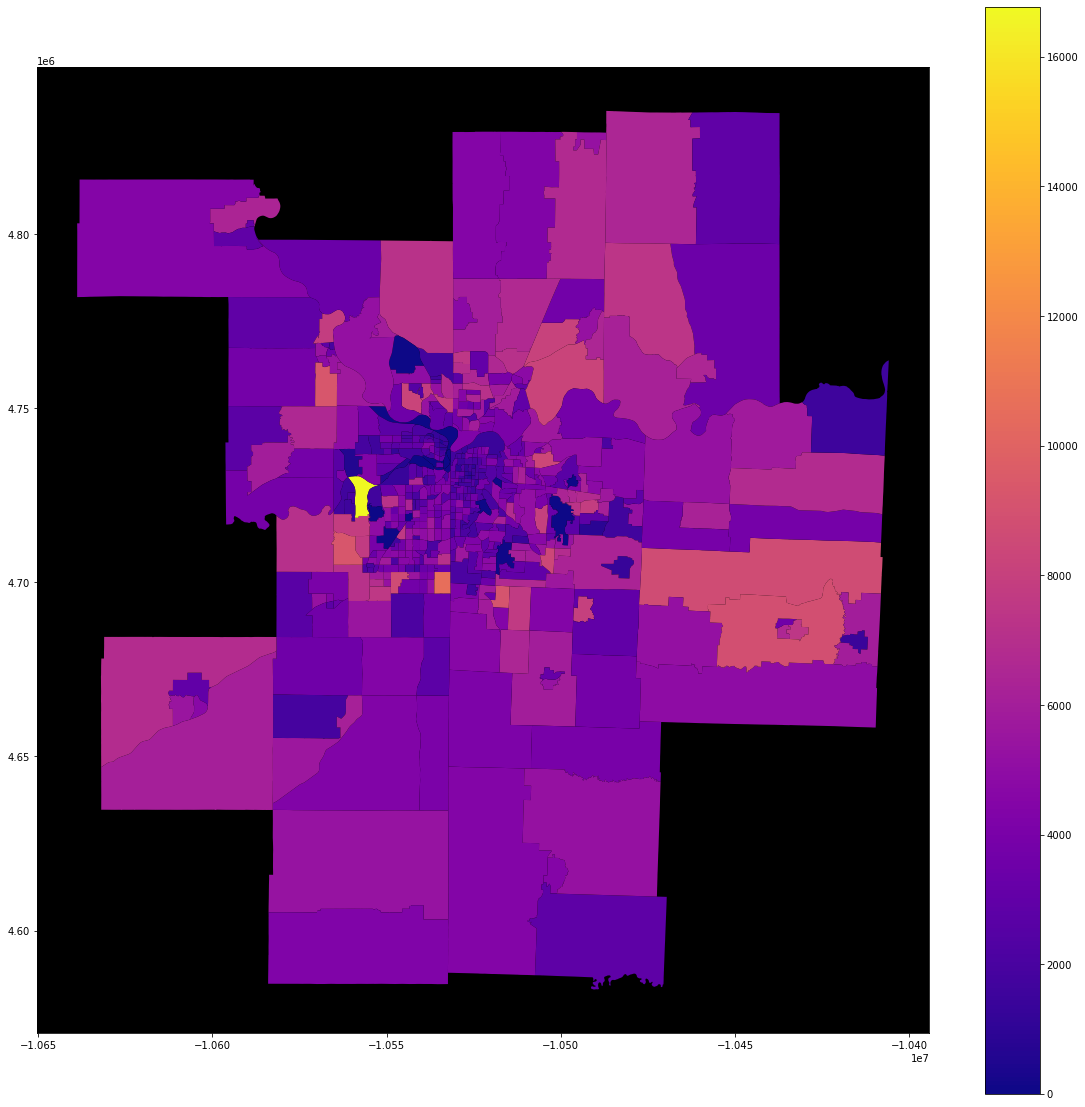

In [ ]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ks.plot('P001001', ax=ax, cmap='plasma', linewidth=0,legend=True)
ax.set_facecolor('k')

## A bit of the weeds

Thus, now `cenpy` has a very simple interface to grab just the data you want and get out of your way. But, there are a few additional helper functions to make it simple to work with data. 

For instance, it's possible to extract the boundary of the *target* boundary using the `return_bounds` argument:

In [ ]:
ma, ma_bounds = dectest.from_state('Massachusetts', 
                                   return_bounds=True)

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0

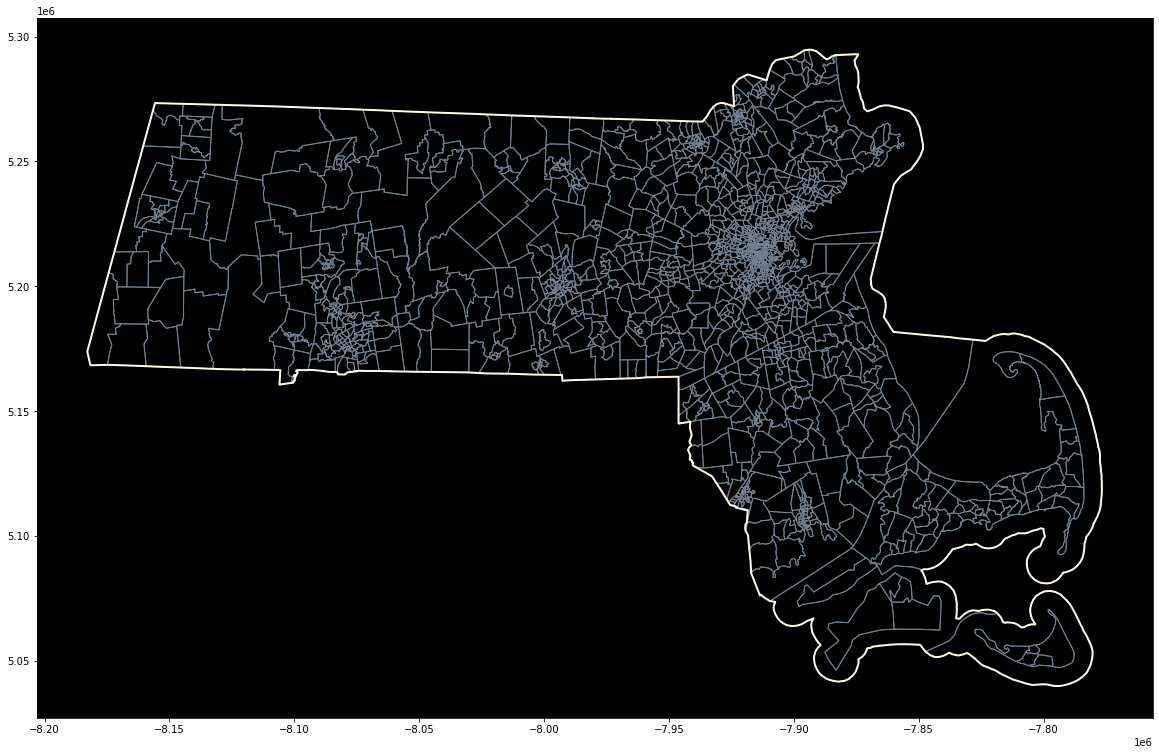

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ma.plot(edgecolor='slategrey', color='none', ax=ax)
ma_bounds.plot(edgecolor='cornsilk', color='none', ax=ax, linewidth=2)
ax.set_facecolor('k')

And, because some kinds of census geometries do not nest neatly within one another, it's possible to request that the "within" part of the geo-in-geo operation is relaxed to only consider geometries that *intersect* with the requested place:

In [ ]:
tuc, tuc_bounds = dectest.from_place('Tucson, AZ', 
                                     level='tract',
                                     return_bounds=True, strict_within=False)

Matched: Tucson, AZ to Tucson city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


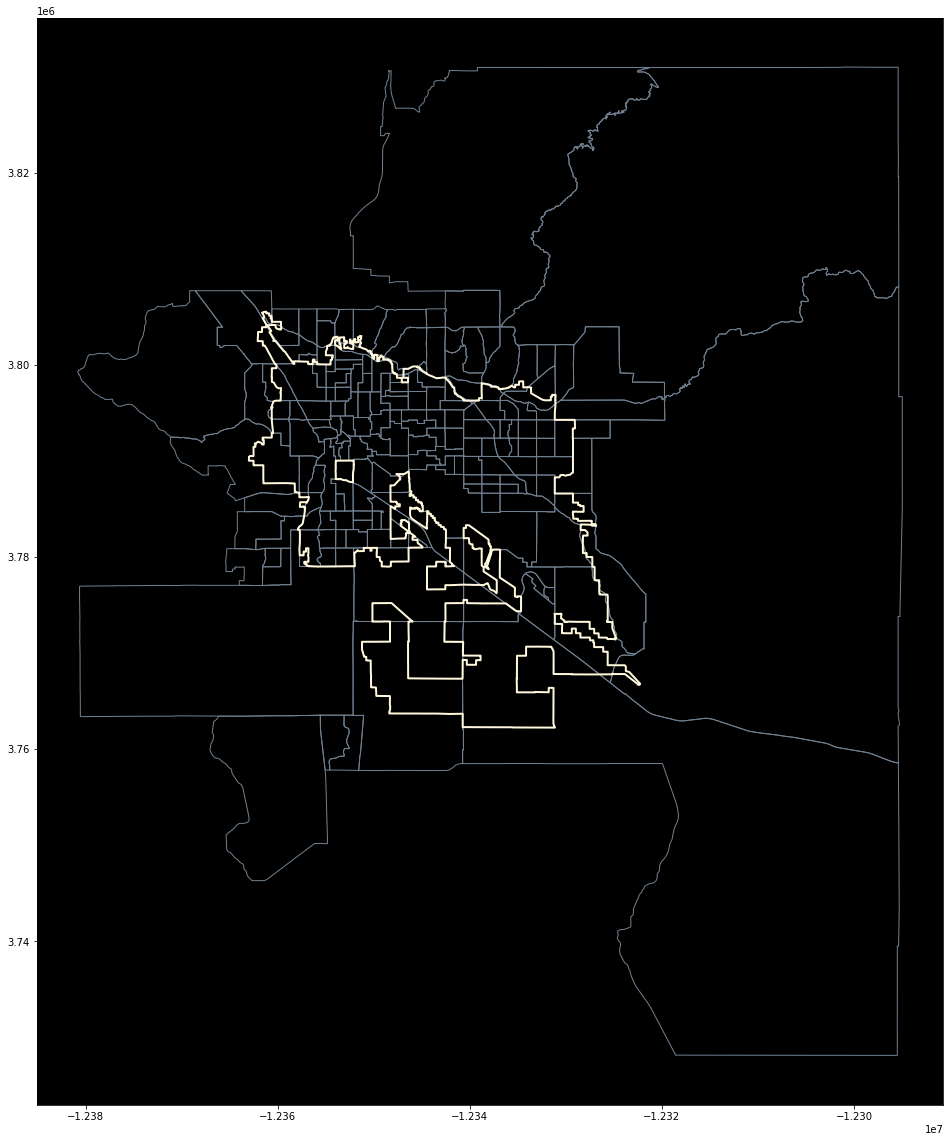

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
tuc.plot(edgecolor='slategrey', color='none', ax=ax)
tuc_bounds.plot(edgecolor='cornsilk', color='none', ax=ax, linewidth=2)
ax.set_facecolor('k')

# Additional Products

This works for all of the ACSs that are supported by the Web Mapping Service. This means that `cenpy` supports this place-based API for the results from 2013 to 2017:

In [ ]:
for year in range(2017, 2018):
    print(year)
    acs = products.ACS(year=year)
    acs.from_place('Tucson, AZ')

2017
Matched: Tucson, AZ to Tucson city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


And it has the same general structure as we saw before:

In [ ]:
sf = products.ACS(2017).from_place('San Francisco, CA', level='tract',
                                   variables=['B00002*', 'B01002H_001E'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


Matched: San Francisco, CA to San Francisco city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


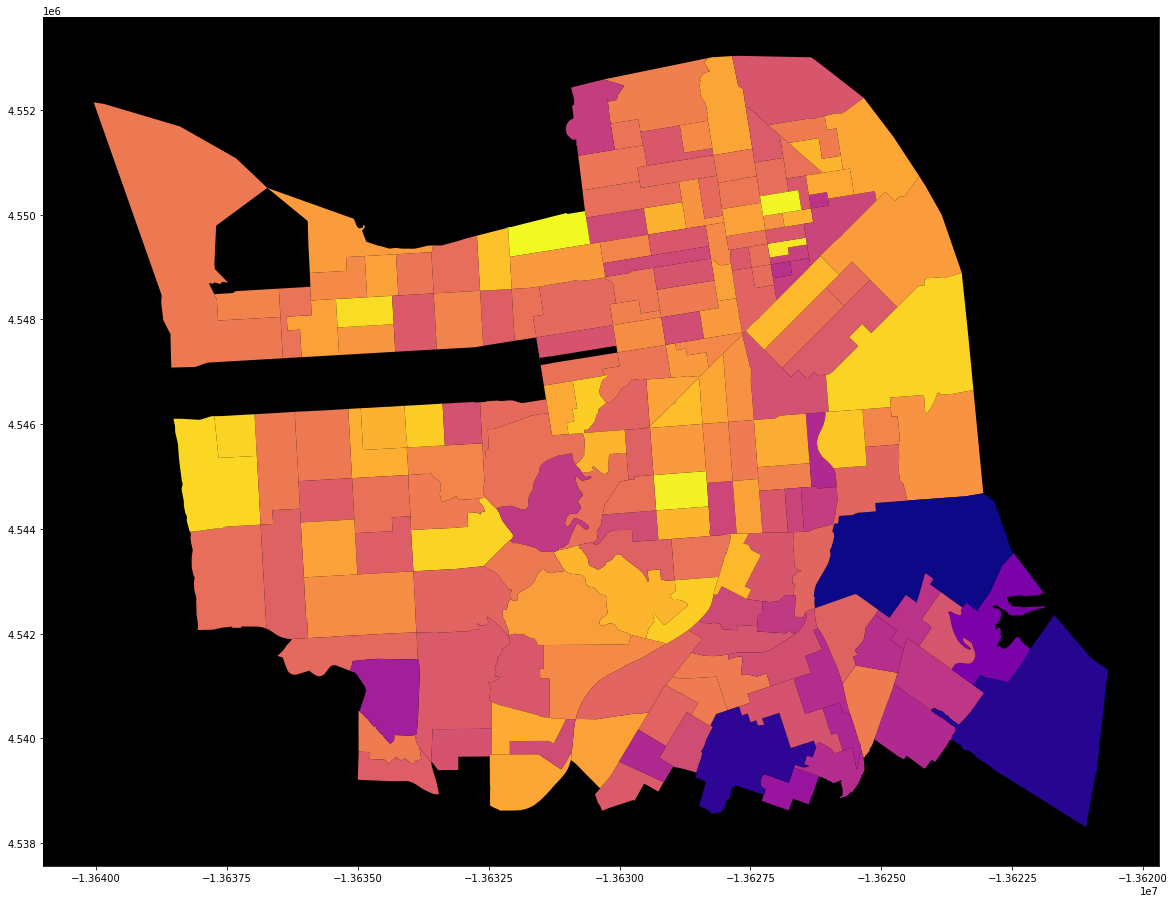

In [ ]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ax = sf.dropna(subset=['B00002_001E']).plot('B00002_001E', cmap='plasma', linewidth=0, ax=ax)
ax.set_facecolor('k')

# Happy hacking!

To install this version of cenpy, grab the *release candidate*:

```
pip install --pre cenpy
```

File bugs, rough edges, things you want me to know about, and interesting behavior at [https://github.com/ljwolf/cenpy](https://github.com/ljwolf/cenpy)!

In [ ]:
import pandas as pd
import cenpy

In [ ]:
# Call list of available datasets, verbose = True to include dataset title
datasets = list(cenpy.explorer.available(verbose=True).items())
# Convert dictionary to dataframe
datasets = pd.DataFrame(datasets, columns = ['code', 'dataset name'])

In [ ]:
datasets

,code,dataset name
0,c_isTimeseries,ABSCB2017 NaN ABSCB2018 NaN ...
1,c_isMicrodata,ABSCB2017 NaN ABSCB2018 NaN ...
2,publisher,ABSCB2017 U.S. Census Bureau ABSCB201...
3,temporal,ABSCB2017 NaN ABSCB2018 ...
4,spatial,ABSCB2017 NaN ABSCB2018 ...
5,programCode,ABSCB2017 006:007 ABSCB2018 ...
6,modified,ABSCB2017 2020-04-30 00:00:00.0 ABSCB...
7,keyword,"ABSCB2017 (census,) ABSCB2018 ..."
8,contactPoint,"ABSCB2017 {'fn': 'ASE Staff', 'hasEma..."
9,distribution,ABSCB2017 {'@type': 'dcat:Distributio...


In [ ]:
print(datasets.loc[[7]])

      code                                       dataset name
7  keyword  ABSCB2017          (census,)
ABSCB2018        ...
